# Hunting Z

### Initializing Z-hunt: 
#### What does the user input in the program? -Not entirely sure yet. 

The authors wrote about the program having certain funcionalities and I see a lot of functions in the code, I'm not sure if they are all called by the way that I am using to execute it. I have really no experience in C and this is just the way with which I managed to run the program. **I'm explaining this in detail, as it could already be erroneous or not optimal**. 

Unfortunately I couldn't find neither in the article or the code, clear instructions about how to properly intialize the program. After creating an executable of zhunt3.c,

Running the program with in the terminal

>> ./zhunt3

Prints out: 
>> ** 'usage: windowsize, minsize, maxsize, datafile' **. 

Very weirdly these words are only found once in the whole code, when they are called. Reading the main() function of zhunt, the core of the program. I found out that it takes four arguments to run and ***these are what the user needs to input to make the program run***. 

This is what I have assumed:

 
- The main() function of the file zhunt3.c requires the arguments: windowsize, minsize, maxsize and datafile to execute. 
- The arguments are referred to by the program as argv[1], argv[2], argv[3] and argv[4] respectively.




- The datafile = argv[4] is a given as a path to a text file z.B /Users/DiegoLibrary/sampledna.txt. 

- After the program is executed, 

>> /.zhunt3 windowsize minsize maxsize sampledna.txt

- A text file with the same name but an appended extension is created: sampledna.txt.Z-editor

## Problem

Still don't understand the meaning of some values. Very few documentation about how to run the program. There are some hints given in the articles but not clear boundaries for the arguments are defined.

There is some documentation, about that it used to give a server in the internet. It was shut off though.

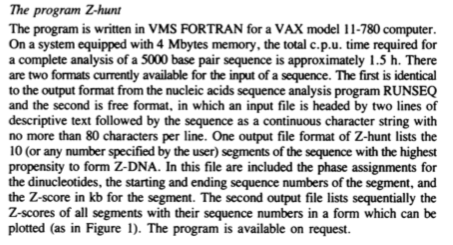

In [222]:
from IPython.display import Image
Image('/Users/jdchipox/Desktop/Info.png')

## Calling zhunt in the terminal within python

As I don't know C.
I didn't direclty communicate C with python. As I discovered the subprocess.Popen() function that allows me run the terminal and execute Z-hunt3.c with the initial arguments from python. The text file created by C can be then retrieved and read with python.

In [324]:
import os
import subprocess

p = subprocess.Popen('ls', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in p.stdout.readlines():
    print(line)
retval = p.wait()

b'Hunting-Z.ipynb\n'
b'SimianVirus40.txt\n'
b'zhunt3\n'
b'zhunt3.c\n'


In [314]:
# Authorize  zhunt to be executed. From terminal  chmod +x zhunt3 to be able to use zhunt3 with subprocess()

## Calling the program
With the required arguments and a sample DNA, in this case SV40. ** Creates a new file**.

Here I put 24, 16, 16 as windowsize minsize and maxsize for no particular reason.

In [409]:
import subprocess
#Execute zhunt with the arguments windowsize, minsize, maxsize and datafile...
out = subprocess.check_output(["./zhunt3", '24', '16', '16', 'SimianVirus40.txt'])

In [317]:
#An output file is produced as seen.
p = subprocess.Popen('ls', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in p.stdout.readlines():
    print(line)
retval = p.wait()

b'Hunting-Z.ipynb\n'
b'SimianVirus40.txt\n'
b'SimianVirus40.txt.Z-SCORE\n'
b'zhunt3\n'
b'zhunt3.c\n'


## Reading the output text with python

In [ ]:
# This is how the output text looks..

The first line of the output file contains the arguments that were given into the program. The result values are printed after them. 
From these lines I adjusted the format so that it reads the text and separates values by spaces. 

In [415]:
import ipywidgets as widgets
from beakerx import *
import pandas as pd
data = pd.read_csv('SimianVirus40.txt.Z-Score', names=['Unclear1','Unclear2','Z-Score','Conformation of Stretches'], 
                   skiprows=1, sep='\s+')

In [411]:
data

- A Pandas DataFrame is very convenient, as it can hold different types of values in different columns.  
- In this format, Individual columns can be called by >> data['ColumnName'].

- Here I displayed the DataFrame using a table widget from beakers, an extension that allows to interact with the data. By clicking on top of the column one can sort out columns in asceding or descending order + other various functionalities like color them 

# Extracting values from a column

Here I extracted the Z-Scores from the results. 

- Here we see that the length of the Z-score column equals the length of SV40 DNA. So there is one Z-Score assigned by the program to every single nucleotide. **So the index column is the position in the DNA**

In [416]:
# Extracting Z-Scores
y = list(data['Z-Score'])

In [417]:
# Number of Z-Scores
len(y) 

5248

# Comparing the output with the results from the article

Here I used the highest Z-Scores values for SV40 from table IV and a graph from figure 1 of the article by Pui S.Ho et al.

In [418]:
data.nlargest(10, 'Z-Score') # This could be later put into a button for easy access. 

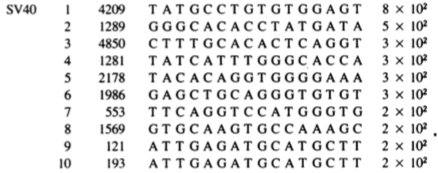

In [326]:
# Z-Scores mentioned in the article.
from IPython.display import Image
Image('/Users/jdchipox/Desktop/SV40table.png')

** Comparing the results from this test with the SV40 calculations from the article: **
- For our test the highest Z-Scores are found at the positions 4202 and 1281.
- From the article those values are at the positions 4209 and 1289 **Very similar**
- The rest of the Z-Scores and their behavior **aren't similar**.

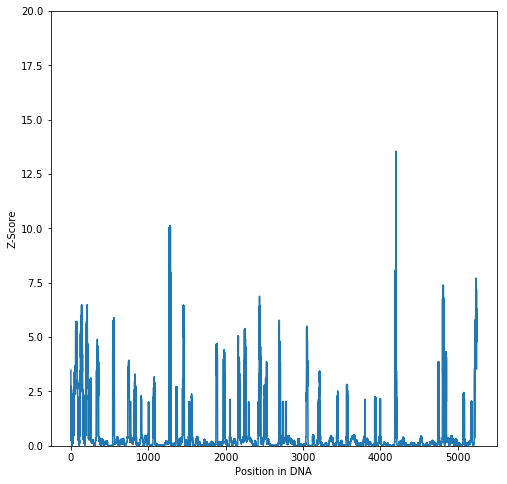

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
indexes = [i for i in range(len(y))] # ! change it for df abstraction
plt.xlabel(r"Position in DNA")
plt.ylabel(r"Z-Score")
plt.ylim(0,20)
p = plt.plot(indexes, y)
plt.show(p)

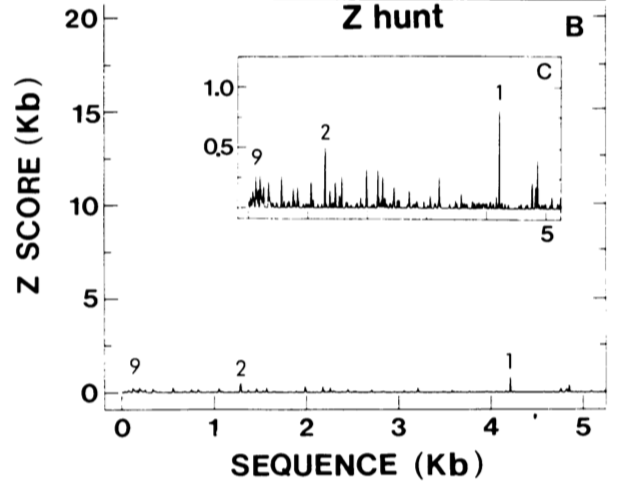

In [235]:
Image('/Users/jdchipox/Desktop/Screen Shot 2018-07-04 at 9.20.44 PM.png')

In the inner plot of the figure above, the y-axis is scaled by a magntiude of five.

*Note that the highest Z-score in the table was 800. In the graph above the Z-scores are given as (kb). So the Z-scores from the program were divided by a 1000*

I didn't do this for my plot as the maximum Z-score value is only 13.5

- ** The maxima of both plots occur around the same positions.**
- So perhaps with the right arguments (unclear values) one could replicate the same results

# Prototipo

- Paste DNA sequence
- Define arguments 
- Filename for saving
- Button for calling zhunt

**Zhunt takes a while computing**

In [1]:
# Wrapping all of this into a cell 
import pandas as pd
import ipywidgets as widgets
from beakerx import *
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import subprocess


DNA = ''
empty_notes = ''
windowsize = ''
minsize = ''
maxsize = ''
nombre = ''
filename = ''
outputext=''
data = pd.DataFrame()

text = widgets.Text(
    value='',
    placeholder='Paste DNA',
    description='Sequence:',
    disabled=False)
text1 = widgets.Text(
    value='16',
    placeholder='Unclear Argument',
    description='Windowsize:',
    disabled=False)
text2 = widgets.Text(
    value='16',
    placeholder='Minimum length of stretches',
    description='Minsize:',
    disabled=False)
text3 = widgets.Text(
    value='16',
    placeholder='Maximum length of stretches',
    description='Maxsize:',
    disabled=False)
text4 = widgets.Text(
    value='FileName',
    placeholder='Filename of output txt.file',
    description='Name:',
    disabled=False)

def handle_submit(sender):
    global empty_notes
    global DNA, windowsize, minsize, maxsize, nombre
    DNA = text.value
    windowsize = text1.value
    minsize = text2.value
    maxsize = text3.value
    nombre = text4.value
    

# Here one could put a filter to verify that the right values for the arguments are given. 



# SOLU FUNCIONA SI SE ENVIA OSEA SI SE UNDE ENTER.
text.on_submit(handle_submit)
text1.on_submit(handle_submit)
text2.on_submit(handle_submit)
text3.on_submit(handle_submit)
text4.on_submit(handle_submit)


import ipywidgets as widgets
button = widgets.Button(description='Calculate...')
out1 = widgets.Output()
def on_button_clicked(b):
    global y
    global data
    global filename
    global outputext
    from IPython.display import display
    button.description = 'clicked'
    with out1: # Some filter
        if nombre != '' or DNA != '' or windowsize != '' or minsize != '' or maxsize != '':
            print('Ok')
            filename = nombre +'.txt'
            outputext = filename + '.Z-SCORE'
            f= open(filename,"w+")
            f.write(DNA)
            f.close() 
            # Defino los argumentos de z-hunt:
            z_hunt_arguments = ["./zhunt3", windowsize, minsize, maxsize, filename]
            #Execute zhunt with the arguments windowsize, minsize, maxsize and datafile...
            out = subprocess.check_output(z_hunt_arguments)
            
            
            data = pd.read_csv(outputext, names=['Unclear1','Unclear2','Z-Score','Conformation of Stretches'], skiprows=1, sep='\s+')
            
            # Extracting Z-Scores
            y = list(data['Z-Score'])
            data
            

button.on_click(on_button_clicked)
widgets.VBox([button, out1])
display(text,text1,text2,text3,text4,button)



Text(value='', description='Sequence:', placeholder='Paste DNA')

Text(value='16', description='Windowsize:', placeholder='Unclear Argument')

Text(value='16', description='Minsize:', placeholder='Minimum length of stretches')

Text(value='16', description='Maxsize:', placeholder='Maximum length of stretches')

Text(value='FileName', description='Name:', placeholder='Filename of output txt.file')

Button(description='Calculate...', style=ButtonStyle())

- Button for plotting a graph

In [6]:
def plot():
    plt.figure(figsize = (12,5))
    indexes = [i for i in range(len(y))] # ! change it for df abstraction
    plt.xlabel(r"Position in DNA sequence")
    plt.ylabel(r"Z-Score")
    plt.ylim(0, max(y)+10000)
    p = plt.plot(indexes, y)
    plt.show(p)
button2 = widgets.Button(description='Display Graph')
out2 = widgets.Output()
def on_button_clicked2(b):
    button2.description = 'Graph'
    with out2:
        plot()

button2.on_click(on_button_clicked2)
widgets.VBox([button2, out2])





- Button: display table

- Button display DNA and its length

In [8]:
button5 = widgets.Button(description='Display Table')
out5 = widgets.Output()
def on_button_clicked1(b):
    button5.description = 'Results'
    with out5:
        display(data)  # OR
button5.on_click(on_button_clicked1)
widgets.VBox([button5, out5])


In [7]:
button1 = widgets.Button(description='Display DNA')
out1 = widgets.Output()
def on_button_clicked1(b):
    button1.description = str(len(y))+ ' bases'
    with out1:
        print(DNA)

button1.on_click(on_button_clicked1)
widgets.VBox([button1, out1])

Current problem
** Zhunt3.c takes time to execute**
- Putting everything in a single button does not execute properly. Python tries to make the plot before zhunt has finished running. I thought of putting python to sleep for some seconds after executing zhunt, but that seems kind of clunky

- Another little problem, after entering the arguments to run the program in each text window. Enter *must* be pressed, otherwise no input is given.


## [!] Please ignore this part [!]

-Testiando el programa con una secuencia extrana para ver como funciona

To check how the program behaves DNA with very uniform patterns was checked.

In [ ]:
testdna = 
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
ATATATATATATAATATATATATAATATATATATAATATTATATATATATATATAATATATAATATATA
TGTGTGTGGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTG
CACACACACACACACACACACACACACACACACACACACACACACACACACACACACACACACACACAC
AGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAAGAGAGAGAAGAGAGAGAGAGAAGAGAG
CGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC
GCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCG
CGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC
GGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC
TCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCG


In [259]:
A = ['A' for i in range(50)]
T = ['T' for i in range(50)]
G = ['G' for i in range(50)]
C = ['C' for i in range(50)]


## Plotting different behaviors.

- A's, T's C's and G's alone in a sequence have a Z-score of 0.
- Multiple CG's or GC's in a sequence are associated with an extremely high Z-score. 

But, interrupting the pattern. For example CGCGCG**GCGCGC** dramatically sinks the Z-score but slowly builds up again ?

 Inputting GCGCGCGCGCGCGCGC first line and CGCGCGCGCGCGCGCG second line although they are all equal, the Z-score value seems to be interrupted depending on where the next line in the sequence is defined. Esta muy raro esto ojala pueda hacer algo sin tener que entrar en c o estoy jodido

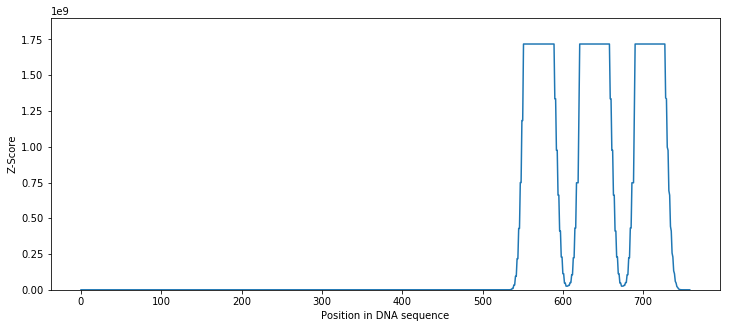

In [289]:
# Plotting different behaviours

def BehaviorPlot():
    
    
    
    
    plt.figure(figsize = (12,5))
    indexes = [i for i in range(len(y))] # ! change it for df abstraction
    plt.xlabel(r"Position in DNA sequence")
    plt.ylabel(r"Z-Score")
    plt.ylim(0, 1900000000)
    p = plt.plot(indexes, y)
    plt.show(p)
plot1()




In [304]:
'aaaabbbbcccc'[0:4]

'aaaa'

In [303]:
'H1H10F1200120008F4F4'

result = 
for i in [0,4,8,12,16]
    result.append(paket[i + 4])
if result[2] == ..
...
else.. 






In [ ]:
! I HAD TO HACK THE TERMINAL..

FIRST ENTER IN THE DIf= open("guru99.txt","w+")RECTORY OF WHERE THE FILES ARE WITH cd FolderName. Then type ls to verify. After that I typed: 
    
    chmod +x zhunt3

In [312]:
numbers = [1,2,3,4,5,6,5,3,10]
def high_and_low(numbers):
    return str(max(numbers)) + ' ' + str(min(numbers))
high_and_low(numbers)
2+None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'